## Package imports and data setup

These steps are identical to those in `intro_streaming_bookshelf`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import stumpy # Matrix Profile
from stumpy.floss import _cac # One sided cac

import ot # Optimal Transport

from vmdpy import VMD # Variational Mode Decomposition 

from ruptures.metrics import hausdorff # Quantifying Break Point Discrepancies

# Utils
import time
import os
loc = os.getcwd() 

# Matplotlib Params
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

from matplotlib import animation
from IPython.display import HTML

import scripts



In [5]:
data_dict = np.load('data_dict.npy', allow_pickle=True).item()
cases = [['L00','D00','V08'], ['L1C','DB0','V08'],  ['L1C','DBB','V08'], ['L13','DBB','V08']]

df_list = scripts.exp_list_process(data_dict, cases, 10)

# Processing sensor 1 (only Welch)
In this section, for the sake of examining false positives in the simplest scenario in which we observed one, we Welch transform the raw data for Sensor 1 (no VMD). 

In [ ]:
# Compute the welch transform then concatenate transformed data into a single time series.
building_features = scripts.welch_vmd(df_list['Sensor1'])
building_features_seq = scripts.data_sequencing(building_features, vmd=0)

# Investigating CAC Curves

Here, we reproduce the figures from section 4.1, _Improvements to the Corrected Arc Curve in the context of Batch Processing for Streaming Algorithms_, used to investigate the false positives occurring in the first frames of each of our FLOSS Streaming demonstrations.


In [9]:
m=100
L=m
old_data = building_features_seq[:513*5]


Figure 48: Welch transformation of batch data introduces artificial periodicity as an artefact of the
batch processing algorithm.

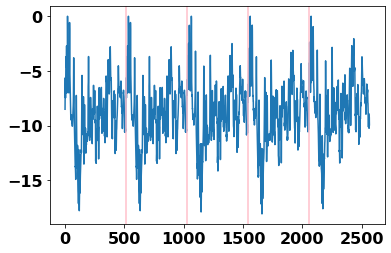

In [10]:
plt.plot(old_data)
plt.axvline(513,color='pink')
plt.axvline(513*2,color='pink')
plt.axvline(513*3,color='pink')
plt.axvline(513*4,color='pink')

## False positive images

In [11]:
mp = stumpy.stump(old_data, m=m)
cac_1d = _cac(mp[:, 3], L, bidirectional=False, excl_factor=1)  # This is for demo purposes only. Use floss() below!


Figure 49, image 1: CAC at false positive.

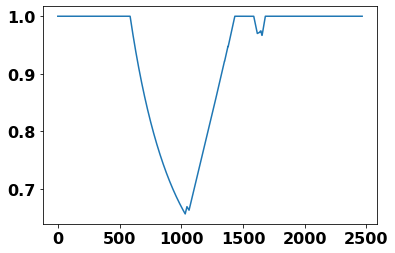

In [12]:
plt.plot(cac_1d)


Figure 49, image 2: Arc curve at false positive.

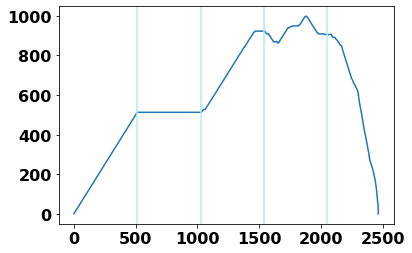

In [13]:
from stumpy.floss import _nnmark
plt.plot(_nnmark(mp[:,3]))
plt.axvline(513,color='paleturquoise')
plt.axvline(513*2,color='paleturquoise')
plt.axvline(513*3,color='paleturquoise')
plt.axvline(513*4,color='paleturquoise')

Figure 49, image 5: right nearest neighbour indices at FP

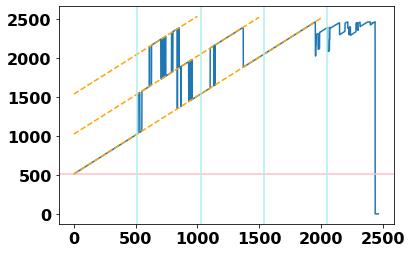

In [14]:
plt.plot(mp[:,3])
plt.axhline(y=513,color='pink')
x1=[0,2000]
y1=[513,2513]
plt.plot(x1,y1,'--',color='orange')
x2=[0,1500]
y2=[2*513,2*513+1500]
plt.plot(x2,y2,'--',color='orange')
x3=[0,1000]
y3=[3*513,3*513+1000]
plt.plot(x3,y3,'--',color='orange')
x4=[0,2000]
y4=[0,2000]
# plt.plot(x4,y4,'--',color='orange')
plt.axvline(513,color='paleturquoise')
plt.axvline(513*2,color='paleturquoise')
plt.axvline(513*3,color='paleturquoise')
plt.axvline(513*4,color='paleturquoise')

## True Positive images

In [16]:
first_reg_change = building_features_seq[513*7:513*12]
mp = stumpy.stump(first_reg_change, m=m)
cac_1d = _cac(mp[:, 3], L, bidirectional=False, excl_factor=1)  # This is for demo purposes only. Use floss() below!


Figure 49, image 3: CAC at true positive

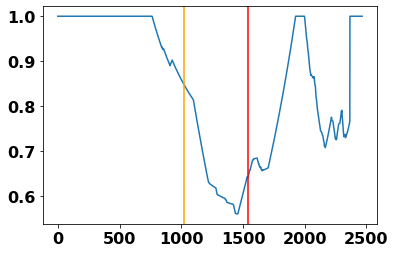

In [17]:
plt.plot(cac_1d)
plt.axvline(x=513*3,color='red')
plt.axvline(x=513*2,color='orange')

Figure 49, image 4: Arc Curve at true positive

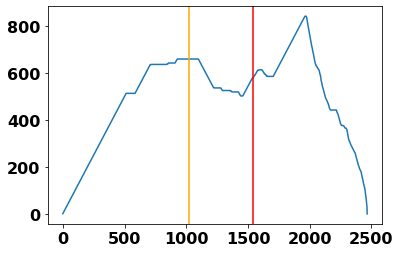

In [18]:
plt.plot(_nnmark(mp[:,3]))
plt.axvline(x=513*3,color='red')
plt.axvline(x=513*2,color='orange')

Figure 49, image 6: right nearest neighbour indices at true positive

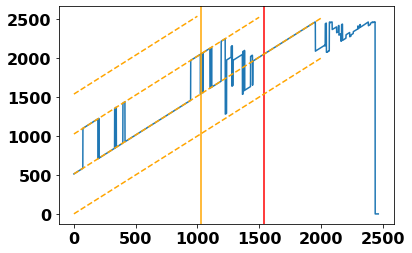

In [19]:
plt.plot(mp[:,3])
plt.axvline(x=513*3,color='red')
plt.axvline(x=513*2,color='orange')
# plt.axvline(x=513*3-100,color='yellow')
x1=[0,2000]
y1=[513,2513]
plt.plot(x1,y1,'--',color='orange')
x2=[0,1500]
y2=[2*513,2*513+1500]
plt.plot(x2,y2,'--',color='orange')
x3=[0,1000]
y3=[3*513,3*513+1000]
plt.plot(x3,y3,'--',color='orange')
x4=[0,2000]
y4=[0,2000]
plt.plot(x4,y4,'--',color='orange')